In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

100% 715M/715M [00:43<00:00, 16.6MB/s]
100% 715M/715M [00:43<00:00, 17.2MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
dataset ='/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [6]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [7]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.0/379.0 KB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.7/139.7 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.4 MB/s eta 0:00:00


In [9]:
import py7zr
archive = py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [10]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [12]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import os

In [13]:
filenames = os.listdir('/content/train')

In [14]:
type(filenames)

list

In [15]:
print(filenames[0:5])
print(filenames[-5:])

['3953.png', '22836.png', '34799.png', '36794.png', '15377.png']
['15230.png', '33407.png', '12580.png', '2772.png', '7997.png']


Labels processing

In [16]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [18]:
labels_df.shape

(50000, 2)

In [19]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [22]:
labels_df[labels_df['id']==2896]

,id,label
2895,2896,airplane


In [23]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [24]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [25]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [27]:
labels_dictionary = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
labels = [labels_dictionary[i] for i in labels_df['label']]

In [28]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


displaying sample image

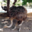

In [32]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/6098.png')
cv2_imshow(img)

In [31]:
id_list = list(labels_df['id'])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


image processing

In [34]:
train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [36]:
type(data[0])


(32, 32, 3)

In [37]:
data[0].shape

(32, 32, 3)

In [38]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [39]:
X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [40]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Split the data set

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


Scale the data

In [43]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [44]:
X_train

array([[[[209, 210, 203],
         [213, 214, 209],
         [218, 219, 215],
         ...,
         [127,  74,  39],
         [122,  68,  35],
         [116,  63,  32]],

        [[210, 210, 202],
         [213, 214, 207],
         [218, 220, 214],
         ...,
         [124,  70,  35],
         [121,  67,  33],
         [123,  69,  36]],

        [[206, 205, 195],
         [209, 209, 202],
         [213, 215, 209],
         ...,
         [124,  70,  37],
         [131,  77,  42],
         [131,  78,  41]],

        ...,

        [[127, 108,  97],
         [138, 122, 110],
         [141, 127, 118],
         ...,
         [158, 149, 134],
         [161, 156, 151],
         [136, 137, 148]],

        [[145, 130, 119],
         [148, 135, 128],
         [136, 127, 128],
         ...,
         [175, 174, 172],
         [160, 161, 170],
         [143, 148, 164]],

        [[138, 128, 123],
         [140, 132, 136],
         [136, 131, 140],
         ...,
         [150, 154, 169],
        

In [45]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [46]:
import tensorflow as tf
from tensorflow import keras

Neural Network

Setting layers of neural network

In [47]:
num_of_classes = 10
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

Compile the Neural Network

In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Train the neural network

In [53]:
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 2.0966 - acc: 0.2193 - val_loss: 1.9940 - val_acc: 0.2500
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9908 - acc: 0.2418 - val_loss: 1.9736 - val_acc: 0.2320
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9619 - acc: 0.2434 - val_loss: 1.9469 - val_acc: 0.2415
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9480 - acc: 0.2473 - val_loss: 1.9209 - val_acc: 0.2520
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9394 - acc: 0.2487 - val_loss: 1.9180 - val_acc: 0.2467
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9328 - acc: 0.2514 - val_loss: 1.9330 - val_acc: 0.2503
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9317 - acc: 0.2519 - val_loss: 1.9262 - val_acc: 0.2540
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

RESNET50

In [54]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [55]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [56]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [58]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [59]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 496s 424ms/step - loss: 1.6633 - acc: 0.4516 - val_loss: 0.8104 - val_acc: 0.7575
Epoch 2/10
1125/1125 [==============================] - 471s 419ms/step - loss: 0.9722 - acc: 0.7114 - val_loss: 0.4569 - val_acc: 0.8923
Epoch 3/10
1125/1125 [==============================] - 477s 424ms/step - loss: 0.7151 - acc: 0.8104 - val_loss: 0.3413 - val_acc: 0.9160
Epoch 4/10
1125/1125 [==============================] - 477s 424ms/step - loss: 0.5441 - acc: 0.8713 - val_loss: 0.2746 - val_acc: 0.9298
Epoch 5/10
1125/1125 [==============================] - 477s 424ms/step - loss: 0.4252 - acc: 0.9092 - val_loss: 0.2553 - val_acc: 0.9345
Epoch 6/10
1125/1125 [==============================] - 477s 424ms/step - loss: 0.3348 - acc: 0.9370 - val_loss: 0.2342 - val_acc: 0.9377
Epoch 7/10
1125/1125 [==============================] - 477s 424ms/step - loss: 0.2701 - acc: 0.9518 - val_loss: 0.2196 - val_acc: 0.9420
Epoch 8/10
1125/1125 [============

In [60]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 40s 124ms/step - loss: 0.2520 - acc: 0.9326
Test Accuracy = 0.9326000213623047


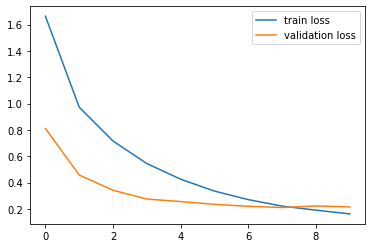

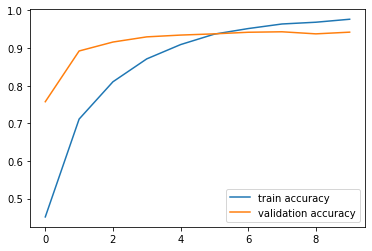

In [61]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()